In [26]:
import geopandas as gpd
import movingpandas as mpd
import pandas as pd
from datetime import datetime, timedelta
from geoviews.element import WMTS
import holoviews as hv
from apiKey import apiKey
# hv.extension('plotly')
# from holoviews import opts

(Failed) Attempt to make background of hvplot an os map tile:

In [ ]:
# Changed {z}/{x}/{y} to capitals
z = '{z}'
x = '{x}'
y = '{y}'
os_tile = WMTS(f'https://api.os.uk/maps/raster/v1/zxy/Light_27700/{z}/{x}/{y}.png?key={apiKey}', name="OSmap")
os_tile

# os_tile = hv.Tiles('https://api.os.uk/maps/raster/v1/zxy/Light_27700/{z}/{x}/{y}.png?key='+apiKey, name="OSmap")

# Dave notes:   (THINK MIGHT NEED TO GET A MAPBOX ACCESS TOKEN TO MAKE IT WORK XO)

# tiles = hv.Tiles('https://api.os.uk/maps/vector/v1/vts?key='+apiKey).opts(
#     mapboxstyle='https://api.os.uk/maps/vector/v1/vts/resources/styles?key='+apiKey,
#     accesstoken=mapbox_token,
#     width=500,
#     height=500,
#     padding=0
# )
# osmaps = hv.Tiles('https://api.os.uk/maps/raster/v1/zxy/Road_3857/{z}/{x}/{y}.png?'+apiKey).opts(width=550, height=550)

:WMTS   [Longitude,Latitude]

In [ ]:
WMTS('https://cartodb-basemaps-4.global.ssl.fastly.net/dark_all/{Z}/{X}/{Y}.png', name="CartoDark")

:WMTS   [Longitude,Latitude]

Plot seal trajectory:

In [27]:
df = gpd.read_file('data/GreySeal_McConnell_UK.csv')
df['geometry'] = gpd.GeoSeries.from_xy(df['location-long'], df['location-lat'], crs='epsg:4326')
df.head()

event-id visible                timestamp location-long location-lat  \
0  8411662037    true  2008-04-09 15:08:00.000      -2.78853     56.44706   
1  8411662038    true  2008-04-09 15:38:04.000      -2.78434     56.43897   
2  8411662039    true  2008-04-09 16:07:08.000      -2.76453       56.439   
3  8411662040    true  2008-04-09 16:37:12.000      -2.74011     56.43968   
4  8411662041    true  2008-04-09 17:07:56.000      -2.70902     56.43893   

  sensor-type individual-taxon-canonical-name tag-local-identifier  \
0         gps              Halichoerus grypus          gp13-902-08   
1         gps              Halichoerus grypus          gp13-902-08   
2         gps              Halichoerus grypus          gp13-902-08   
3         gps              Halichoerus grypus          gp13-902-08   
4         gps              Halichoerus grypus          gp13-902-08   

  individual-local-identifier             study-name  \
0                 gp13-902-08  GreySeal_McConnell_UK   
1                 gp13-902-08  GreySeal_McConnell_UK   
2                 gp13-902-08  GreySeal_McConnell_UK   
3                 gp13-902-08  GreySeal_McConnell_UK   
4                 gp13-902-08  GreySeal_McConnell_UK   

                    geometry  
0  POINT (-2.78853 56.44706)  
1  POINT (-2.78434 56.43897)  
2  POINT (-2.76453 56.43900)  
3  POINT (-2.74011 56.43968)  
4  POINT (-2.70902 56.43893)

<AxesSubplot:>

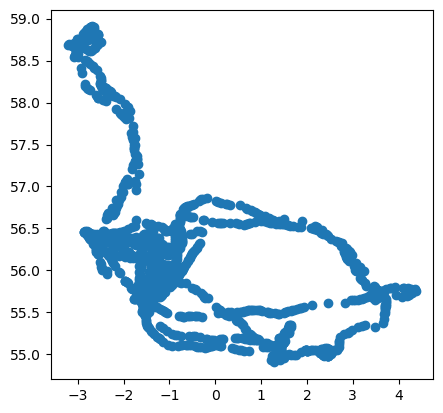

In [22]:
df.plot()

In [28]:
seal = df['individual-taxon-canonical-name'].unique()[0]
print(seal)

Halichoerus grypus


In [29]:
# .Trajectory(df, traj_id, obj_id=None, t=None, x=None, y=None, crs='epsg:4326', parent=None)

traj = mpd.Trajectory(df, 1, t='timestamp')
traj.df.head()

event-id visible location-long location-lat  \
timestamp                                                            
2008-04-09 15:08:00  8411662037    true      -2.78853     56.44706   
2008-04-09 15:38:04  8411662038    true      -2.78434     56.43897   
2008-04-09 16:07:08  8411662039    true      -2.76453       56.439   
2008-04-09 16:37:12  8411662040    true      -2.74011     56.43968   
2008-04-09 17:07:56  8411662041    true      -2.70902     56.43893   

                    sensor-type individual-taxon-canonical-name  \
timestamp                                                         
2008-04-09 15:08:00         gps              Halichoerus grypus   
2008-04-09 15:38:04         gps              Halichoerus grypus   
2008-04-09 16:07:08         gps              Halichoerus grypus   
2008-04-09 16:37:12         gps              Halichoerus grypus   
2008-04-09 17:07:56         gps              Halichoerus grypus   

                    tag-local-identifier individual-local-identifier  \
timestamp                                                              
2008-04-09 15:08:00          gp13-902-08                 gp13-902-08   
2008-04-09 15:38:04          gp13-902-08                 gp13-902-08   
2008-04-09 16:07:08          gp13-902-08                 gp13-902-08   
2008-04-09 16:37:12          gp13-902-08                 gp13-902-08   
2008-04-09 17:07:56          gp13-902-08                 gp13-902-08   

                                study-name                   geometry  
timestamp                                                              
2008-04-09 15:08:00  GreySeal_McConnell_UK  POINT (-2.78853 56.44706)  
2008-04-09 15:38:04  GreySeal_McConnell_UK  POINT (-2.78434 56.43897)  
2008-04-09 16:07:08  GreySeal_McConnell_UK  POINT (-2.76453 56.43900)  
2008-04-09 16:37:12  GreySeal_McConnell_UK  POINT (-2.74011 56.43968)  
2008-04-09 17:07:56  GreySeal_McConnell_UK  POINT (-2.70902 56.43893)

In [30]:
traj.hvplot(title=f'Movement of {seal}', line_width=2, frame_width=700, frame_height=500) 

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]

Find out where seal was on a particular date:

In [31]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
date_range = str(df['timestamp'].dt.date.min()) + ' to ' +str(df['timestamp'].dt.date.max())
print(date_range)

2008-04-09 to 2008-12-05


In [32]:
def plot_location_at_timestamp(traj, timestamp, fig_size=250):
    loc = gpd.GeoDataFrame([traj.get_row_at(timestamp)])
    return (loc.hvplot(title=str(timestamp), geo=True, tiles='OSM', size=200, color='red', width=fig_size, height=fig_size) *
            traj.hvplot(line_width=1.0, color='black', tiles=False, width=fig_size, height=fig_size))

In [33]:
( plot_location_at_timestamp(traj, datetime(2008,12,5)) + 
  plot_location_at_timestamp(traj, datetime(2008,7,20)) +
  plot_location_at_timestamp(traj, datetime(2008,5,1)) )

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Layout
   .Overlay.I   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]
   .Overlay.II  :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]
   .Overlay.III :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Points.I :Points   [Longitude,Latitude]
      .Path.I   :Path   [Longitude,Latitude]

Plot seal speed:

In [35]:
traj.add_speed(overwrite=True)
traj.df.head(4)

event-id visible location-long location-lat  \
timestamp                                                            
2008-04-09 15:08:00  8411662037    true      -2.78853     56.44706   
2008-04-09 15:38:04  8411662038    true      -2.78434     56.43897   
2008-04-09 16:07:08  8411662039    true      -2.76453       56.439   
2008-04-09 16:37:12  8411662040    true      -2.74011     56.43968   

                    sensor-type individual-taxon-canonical-name  \
timestamp                                                         
2008-04-09 15:08:00         gps              Halichoerus grypus   
2008-04-09 15:38:04         gps              Halichoerus grypus   
2008-04-09 16:07:08         gps              Halichoerus grypus   
2008-04-09 16:37:12         gps              Halichoerus grypus   

                    tag-local-identifier individual-local-identifier  \
timestamp                                                              
2008-04-09 15:08:00          gp13-902-08                 gp13-902-08   
2008-04-09 15:38:04          gp13-902-08                 gp13-902-08   
2008-04-09 16:07:08          gp13-902-08                 gp13-902-08   
2008-04-09 16:37:12          gp13-902-08                 gp13-902-08   

                                study-name                   geometry  \
timestamp                                                               
2008-04-09 15:08:00  GreySeal_McConnell_UK  POINT (-2.78853 56.44706)   
2008-04-09 15:38:04  GreySeal_McConnell_UK  POINT (-2.78434 56.43897)   
2008-04-09 16:07:08  GreySeal_McConnell_UK  POINT (-2.76453 56.43900)   
2008-04-09 16:37:12  GreySeal_McConnell_UK  POINT (-2.74011 56.43968)   

                        speed  
timestamp                      
2008-04-09 15:08:00  0.519488  
2008-04-09 15:38:04  0.519488  
2008-04-09 16:07:08  0.700664  
2008-04-09 16:37:12  0.836033

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


<AxesSubplot:>

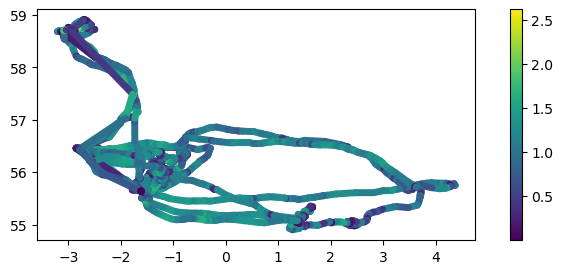

In [36]:
traj.plot(column='speed', linewidth=5, capstyle='round', figsize=(9,3), legend=True)

In [37]:
traj.hvplot(c='speed', line_width=2.5, cmap='Viridis', colorbar=True, tiles='CartoDark', width=700, height=500)

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Overlay
   .Tiles.I :Tiles   [x,y]
   .Path.I  :Path   [Longitude,Latitude]   (speed)

Detecting stops:

In [54]:
detector = mpd.TrajectoryStopDetector(traj)
stops = detector.get_stop_points(min_duration=timedelta(hours=1),
                                     max_diameter=100)
stops

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:150: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(geom) == 2:
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:151: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return _measure_distance(geom[0], geom[1], spherical)


geometry          start_time  \
stop_id                                                                
1_2008-04-29 05:37:00  POINT (-1.61044 55.64574) 2008-04-29 05:37:00   
1_2008-04-30 22:41:24  POINT (-1.61077 55.64546) 2008-04-30 22:41:24   
1_2008-05-07 14:07:00  POINT (-2.79983 56.43634) 2008-05-07 14:07:00   
1_2008-05-08 19:07:00  POINT (-2.79987 56.43629) 2008-05-08 19:07:00   
1_2008-05-09 20:07:00  POINT (-2.79929 56.43620) 2008-05-09 20:07:00   
...                                          ...                 ...   
1_2008-10-24 06:37:00  POINT (-1.62280 55.63973) 2008-10-24 06:37:00   
1_2008-11-08 13:37:00  POINT (-2.93154 58.68701) 2008-11-08 13:37:00   
1_2008-11-12 02:37:12  POINT (-2.70489 58.90445) 2008-11-12 02:37:12   
1_2008-11-19 08:37:00  POINT (-2.79886 56.43461) 2008-11-19 08:37:00   
1_2008-12-03 09:37:00  POINT (-1.62270 55.63922) 2008-12-03 09:37:00   

                                 end_time  traj_id  duration_s  
stop_id                                                         
1_2008-04-29 05:37:00 2008-04-29 08:16:44        1      9584.0  
1_2008-04-30 22:41:24 2008-05-01 01:37:00        1     10536.0  
1_2008-05-07 14:07:00 2008-05-08 17:39:48        1     99168.0  
1_2008-05-08 19:07:00 2008-05-09 08:07:00        1     46800.0  
1_2008-05-09 20:07:00 2008-05-10 05:22:20        1     33320.0  
...                                   ...      ...         ...  
1_2008-10-24 06:37:00 2008-10-24 08:07:00        1      5400.0  
1_2008-11-08 13:37:00 2008-11-08 17:07:00        1     12600.0  
1_2008-11-12 02:37:12 2008-11-12 04:37:04        1      7192.0  
1_2008-11-19 08:37:00 2008-11-19 21:37:00        1     46800.0  
1_2008-12-03 09:37:00 2008-12-05 18:07:00        1    203400.0  

[64 rows x 5 columns]

In [55]:
stops['duration_m'] = stops['duration_s']/60
stops['duration_h'] = stops['duration_m']/60
stops.head()

geometry          start_time  \
stop_id                                                                
1_2008-04-29 05:37:00  POINT (-1.61044 55.64574) 2008-04-29 05:37:00   
1_2008-04-30 22:41:24  POINT (-1.61077 55.64546) 2008-04-30 22:41:24   
1_2008-05-07 14:07:00  POINT (-2.79983 56.43634) 2008-05-07 14:07:00   
1_2008-05-08 19:07:00  POINT (-2.79987 56.43629) 2008-05-08 19:07:00   
1_2008-05-09 20:07:00  POINT (-2.79929 56.43620) 2008-05-09 20:07:00   

                                 end_time  traj_id  duration_s   duration_m  \
stop_id                                                                       
1_2008-04-29 05:37:00 2008-04-29 08:16:44        1      9584.0   159.733333   
1_2008-04-30 22:41:24 2008-05-01 01:37:00        1     10536.0   175.600000   
1_2008-05-07 14:07:00 2008-05-08 17:39:48        1     99168.0  1652.800000   
1_2008-05-08 19:07:00 2008-05-09 08:07:00        1     46800.0   780.000000   
1_2008-05-09 20:07:00 2008-05-10 05:22:20        1     33320.0   555.333333   

                       duration_h  
stop_id                            
1_2008-04-29 05:37:00    2.662222  
1_2008-04-30 22:41:24    2.926667  
1_2008-05-07 14:07:00   27.546667  
1_2008-05-08 19:07:00   13.000000  
1_2008-05-09 20:07:00    9.255556

In [56]:
stop_point_plot = stops.hvplot(c='duration_h', geo=True, cmap='Viridis', colorbar=True, tiles='CartoDark', width=700, height=500)

In [57]:
traj_plot = traj.hvplot(line_width=2.5, tiles='CartoLight', color='darkgray') * stops.hvplot(c='duration_h', geo=True, cmap='Viridis', colorbar=True)
traj_plot

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Path.I   :Path   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (duration_h)

In [58]:
traj_plot = traj.hvplot(c='speed', line_width=2.5, cmap='Viridis', colorbar=True, tiles='CartoDark', width=700, height=500) * stops.hvplot(c='duration_h', geo=True, color='white')
traj_plot

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Path.I   :Path   [Longitude,Latitude]   (speed)
   .Points.I :Points   [Longitude,Latitude]

Splitting at stops:

In [59]:
split = mpd.StopSplitter(traj).split(min_duration=timedelta(minutes=30), max_diameter=100)

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:150: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(geom) == 2:
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:151: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return _measure_distance(geom[0], geom[1], spherical)


In [60]:
split

TrajectoryCollection with 107 trajectories

In [61]:
split.to_traj_gdf()

traj_id             start_t               end_t  \
0    1_2008-04-09 15:08:00 2008-04-09 15:08:00 2008-04-29 05:37:00   
1    1_2008-04-29 08:16:44 2008-04-29 08:16:44 2008-04-30 22:41:24   
2    1_2008-05-01 01:37:00 2008-05-01 01:37:00 2008-05-02 04:07:00   
3    1_2008-05-02 04:37:00 2008-05-02 04:37:00 2008-05-06 02:11:32   
4    1_2008-05-06 03:07:00 2008-05-06 03:07:00 2008-05-06 04:07:32   
..                     ...                 ...                 ...   
102  1_2008-10-24 08:07:00 2008-10-24 08:07:00 2008-11-08 13:37:00   
103  1_2008-11-08 17:07:00 2008-11-08 17:07:00 2008-11-12 03:39:44   
104  1_2008-11-12 04:37:04 2008-11-12 04:37:04 2008-11-13 04:39:56   
105  1_2008-11-13 05:37:00 2008-11-13 05:37:00 2008-11-19 08:37:00   
106  1_2008-11-19 21:37:00 2008-11-19 21:37:00 2008-12-03 09:37:00   

                                              geometry        length  \
0    LINESTRING (-2.78853 56.44706, -2.78434 56.438...  1.317282e+06   
1    LINESTRING (-1.60932 55.64520, -1.60551 55.642...  6.678290e+03   
2    LINESTRING (-1.61069 55.64563, -1.60594 55.643...  1.619414e+04   
3    LINESTRING (-1.60558 55.64230, -1.59298 55.645...  2.361451e+05   
4    LINESTRING (-1.26276 56.33158, -1.26354 56.330...  2.282617e+02   
..                                                 ...           ...   
102  LINESTRING (-1.62223 55.63948, -1.60363 55.642...  4.360882e+05   
103  LINESTRING (-2.93126 58.68753, -2.93311 58.687...  3.948532e+04   
104  LINESTRING (-2.70451 58.90421, -2.70532 58.898...  7.936074e+03   
105  LINESTRING (-2.70254 58.89893, -2.92623 58.723...  3.148850e+05   
106  LINESTRING (-2.79891 56.43466, -2.79720 56.434...  1.208570e+05   

      direction  
0    140.119690  
1    287.628213  
2    131.538677  
3     15.463301  
4    119.766366  
..          ...  
102  347.434169  
103   28.246322  
104  167.059594  
105  181.238375  
106  139.951463  

[107 rows x 6 columns]

In [72]:
stops_30min = detector.get_stop_points(min_duration=timedelta(minutes=30),
                                     max_diameter=100)

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:150: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(geom) == 2:
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:151: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return _measure_distance(geom[0], geom[1], spherical)


In [73]:
stops_30min['duration_m'] = stops_30min['duration_s']/60

In [77]:
split.hvplot(title='Trajectory split at stops where the min duration was 30 mins', line_width=3.0, tiles='CartoDark') * stops_30min.hvplot(c='duration_m', geo=True, color='white')

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWar

:Overlay
   .Tiles.I       :Tiles   [x,y]
   .Path.I        :Path   [Longitude,Latitude]
   .Path.II       :Path   [Longitude,Latitude]
   .Path.III      :Path   [Longitude,Latitude]
   .Path.IV       :Path   [Longitude,Latitude]
   .Path.V        :Path   [Longitude,Latitude]
   .Path.VI       :Path   [Longitude,Latitude]
   .Path.VII      :Path   [Longitude,Latitude]
   .Path.VIII     :Path   [Longitude,Latitude]
   .Path.IX       :Path   [Longitude,Latitude]
   .Path.X        :Path   [Longitude,Latitude]
   .Path.XI       :Path   [Longitude,Latitude]
   .Path.XII      :Path   [Longitude,Latitude]
   .Path.XIII     :Path   [Longitude,Latitude]
   .Path.XIV      :Path   [Longitude,Latitude]
   .Path.XV       :Path   [Longitude,Latitude]
   .Path.XVI      :Path   [Longitude,Latitude]
   .Path.XVII     :Path   [Longitude,Latitude]
   .Path.XVIII    :Path   [Longitude,Latitude]
   .Path.XIX      :Path   [Longitude,Latitude]
   .Path.XX       :Path   [Longitude,Latitude]
   .Path.XXI      :Path   [Longitude,Latitude]
   .Path.XXII     :Path   [Longitude,Latitude]
   .Path.XXIII    :Path   [Longitude,Latitude]
   .Path.XXIV     :Path   [Longitude,Latitude]
   .Path.XXV      :Path   [Longitude,Latitude]
   .Path.XXVI     :Path   [Longitude,Latitude]
   .Path.XXVII    :Path   [Longitude,Latitude]
   .Path.XXVIII   :Path   [Longitude,Latitude]
   .Path.XXIX     :Path   [Longitude,Latitude]
   .Path.XXX      :Path   [Longitude,Latitude]
   .Path.XXXI     :Path   [Longitude,Latitude]
   .Path.XXXII    :Path   [Longitude,Latitude]
   .Path.XXXIII   :Path   [Longitude,Latitude]
   .Path.XXXIV    :Path   [Longitude,Latitude]
   .Path.XXXV     :Path   [Longitude,Latitude]
   .Path.XXXVI    :Path   [Longitude,Latitude]
   .Path.XXXVII   :Path   [Longitude,Latitude]
   .Path.XXXVIII  :Path   [Longitude,Latitude]
   .Path.XXXIX    :Path   [Longitude,Latitude]
   .Path.XL       :Path   [Longitude,Latitude]
   .Path.XLI      :Path   [Longitude,Latitude]
   .Path.XLII     :Path   [Longitude,Latitude]
   .Path.XLIII    :Path   [Longitude,Latitude]
   .Path.XLIV     :Path   [Longitude,Latitude]
   .Path.XLV      :Path   [Longitude,Latitude]
   .Path.XLVI     :Path   [Longitude,Latitude]
   .Path.XLVII    :Path   [Longitude,Latitude]
   .Path.XLVIII   :Path   [Longitude,Latitude]
   .Path.XLIX     :Path   [Longitude,Latitude]
   .Path.L        :Path   [Longitude,Latitude]
   .Path.LI       :Path   [Longitude,Latitude]
   .Path.LII      :Path   [Longitude,Latitude]
   .Path.LIII     :Path   [Longitude,Latitude]
   .Path.LIV      :Path   [Longitude,Latitude]
   .Path.LV       :Path   [Longitude,Latitude]
   .Path.LVI      :Path   [Longitude,Latitude]
   .Path.LVII     :Path   [Longitude,Latitude]
   .Path.LVIII    :Path   [Longitude,Latitude]
   .Path.LIX      :Path   [Longitude,Latitude]
   .Path.LX       :Path   [Longitude,Latitude]
   .Path.LXI      :Path   [Longitude,Latitude]
   .Path.LXII     :Path   [Longitude,Latitude]
   .Path.LXIII    :Path   [Longitude,Latitude]
   .Path.LXIV     :Path   [Longitude,Latitude]
   .Path.LXV      :Path   [Longitude,Latitude]
   .Path.LXVI     :Path   [Longitude,Latitude]
   .Path.LXVII    :Path   [Longitude,Latitude]
   .Path.LXVIII   :Path   [Longitude,Latitude]
   .Path.LXIX     :Path   [Longitude,Latitude]
   .Path.LXX      :Path   [Longitude,Latitude]
   .Path.LXXI     :Path   [Longitude,Latitude]
   .Path.LXXII    :Path   [Longitude,Latitude]
   .Path.LXXIII   :Path   [Longitude,Latitude]
   .Path.LXXIV    :Path   [Longitude,Latitude]
   .Path.LXXV     :Path   [Longitude,Latitude]
   .Path.LXXVI    :Path   [Longitude,Latitude]
   .Path.LXXVII   :Path   [Longitude,Latitude]
   .Path.LXXVIII  :Path   [Longitude,Latitude]
   .Path.LXXIX    :Path   [Longitude,Latitude]
   .Path.LXXX     :Path   [Longitude,Latitude]
   .Path.LXXXI    :Path   [Longitude,Latitude]
   .Path.LXXXII   :Path   [Longitude,Latitude]
   .Path.LXXXIII  :Path   [Longitude,Latitude]
   .Path.LXXXIV   :Path   [Longitude,Latitude]
   .Path.L

In [65]:
stop_segs = detector.get_stop_segments(min_duration=timedelta(seconds=60), max_diameter=100)

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:150: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(geom) == 2:
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\movingpandas\geometry_utils.py:151: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return _measure_distance(geom[0], geom[1], spherical)


In [78]:
stop_segs

TrajectoryCollection with 125 trajectories

In [91]:
stop_segment_plot = stop_segs.hvplot( size=200, line_width=7.0, color='orange', tiles='CartoDark')
stop_segment_plot

c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\MMarochov\Anaconda3\envs\mpd-ex\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWar

:Overlay
   .Tiles.I       :Tiles   [x,y]
   .Path.I        :Path   [Longitude,Latitude]
   .Path.II       :Path   [Longitude,Latitude]
   .Path.III      :Path   [Longitude,Latitude]
   .Path.IV       :Path   [Longitude,Latitude]
   .Path.V        :Path   [Longitude,Latitude]
   .Path.VI       :Path   [Longitude,Latitude]
   .Path.VII      :Path   [Longitude,Latitude]
   .Path.VIII     :Path   [Longitude,Latitude]
   .Path.IX       :Path   [Longitude,Latitude]
   .Path.X        :Path   [Longitude,Latitude]
   .Path.XI       :Path   [Longitude,Latitude]
   .Path.XII      :Path   [Longitude,Latitude]
   .Path.XIII     :Path   [Longitude,Latitude]
   .Path.XIV      :Path   [Longitude,Latitude]
   .Path.XV       :Path   [Longitude,Latitude]
   .Path.XVI      :Path   [Longitude,Latitude]
   .Path.XVII     :Path   [Longitude,Latitude]
   .Path.XVIII    :Path   [Longitude,Latitude]
   .Path.XIX      :Path   [Longitude,Latitude]
   .Path.XX       :Path   [Longitude,Latitude]
   .Path.XXI      :Path   [Longitude,Latitude]
   .Path.XXII     :Path   [Longitude,Latitude]
   .Path.XXIII    :Path   [Longitude,Latitude]
   .Path.XXIV     :Path   [Longitude,Latitude]
   .Path.XXV      :Path   [Longitude,Latitude]
   .Path.XXVI     :Path   [Longitude,Latitude]
   .Path.XXVII    :Path   [Longitude,Latitude]
   .Path.XXVIII   :Path   [Longitude,Latitude]
   .Path.XXIX     :Path   [Longitude,Latitude]
   .Path.XXX      :Path   [Longitude,Latitude]
   .Path.XXXI     :Path   [Longitude,Latitude]
   .Path.XXXII    :Path   [Longitude,Latitude]
   .Path.XXXIII   :Path   [Longitude,Latitude]
   .Path.XXXIV    :Path   [Longitude,Latitude]
   .Path.XXXV     :Path   [Longitude,Latitude]
   .Path.XXXVI    :Path   [Longitude,Latitude]
   .Path.XXXVII   :Path   [Longitude,Latitude]
   .Path.XXXVIII  :Path   [Longitude,Latitude]
   .Path.XXXIX    :Path   [Longitude,Latitude]
   .Path.XL       :Path   [Longitude,Latitude]
   .Path.XLI      :Path   [Longitude,Latitude]
   .Path.XLII     :Path   [Longitude,Latitude]
   .Path.XLIII    :Path   [Longitude,Latitude]
   .Path.XLIV     :Path   [Longitude,Latitude]
   .Path.XLV      :Path   [Longitude,Latitude]
   .Path.XLVI     :Path   [Longitude,Latitude]
   .Path.XLVII    :Path   [Longitude,Latitude]
   .Path.XLVIII   :Path   [Longitude,Latitude]
   .Path.XLIX     :Path   [Longitude,Latitude]
   .Path.L        :Path   [Longitude,Latitude]
   .Path.LI       :Path   [Longitude,Latitude]
   .Path.LII      :Path   [Longitude,Latitude]
   .Path.LIII     :Path   [Longitude,Latitude]
   .Path.LIV      :Path   [Longitude,Latitude]
   .Path.LV       :Path   [Longitude,Latitude]
   .Path.LVI      :Path   [Longitude,Latitude]
   .Path.LVII     :Path   [Longitude,Latitude]
   .Path.LVIII    :Path   [Longitude,Latitude]
   .Path.LIX      :Path   [Longitude,Latitude]
   .Path.LX       :Path   [Longitude,Latitude]
   .Path.LXI      :Path   [Longitude,Latitude]
   .Path.LXII     :Path   [Longitude,Latitude]
   .Path.LXIII    :Path   [Longitude,Latitude]
   .Path.LXIV     :Path   [Longitude,Latitude]
   .Path.LXV      :Path   [Longitude,Latitude]
   .Path.LXVI     :Path   [Longitude,Latitude]
   .Path.LXVII    :Path   [Longitude,Latitude]
   .Path.LXVIII   :Path   [Longitude,Latitude]
   .Path.LXIX     :Path   [Longitude,Latitude]
   .Path.LXX      :Path   [Longitude,Latitude]
   .Path.LXXI     :Path   [Longitude,Latitude]
   .Path.LXXII    :Path   [Longitude,Latitude]
   .Path.LXXIII   :Path   [Longitude,Latitude]
   .Path.LXXIV    :Path   [Longitude,Latitude]
   .Path.LXXV     :Path   [Longitude,Latitude]
   .Path.LXXVI    :Path   [Longitude,Latitude]
   .Path.LXXVII   :Path   [Longitude,Latitude]
   .Path.LXXVIII  :Path   [Longitude,Latitude]
   .Path.LXXIX    :Path   [Longitude,Latitude]
   .Path.LXXX     :Path   [Longitude,Latitude]
   .Path.LXXXI    :Path   [Longitude,Latitude]
   .Path.LXXXII   :Path   [Longitude,Latitude]
   .Path.LXXXIII  :Path   [Longitude,Latitude]
   .Path.LXXXIV   :Path   [Longitude,Latitude]
   .Path.L